<a href="https://colab.research.google.com/github/PrajwalPPatil/Predict_startup_profit-using-ML/blob/main/Predict_startup_profit_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective : To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset
data = pd.read_csv(r"C:\Users\Laptop hub\Downloads\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#Check No. of rows & Columns
data.shape

(50, 5)

In [ ]:
#Display column names
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
#Check summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
#Check missing values
missing_values=data.isnull().sum()
print("Missing values in each column: \n")
missing_values

Missing values in each column: 



R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

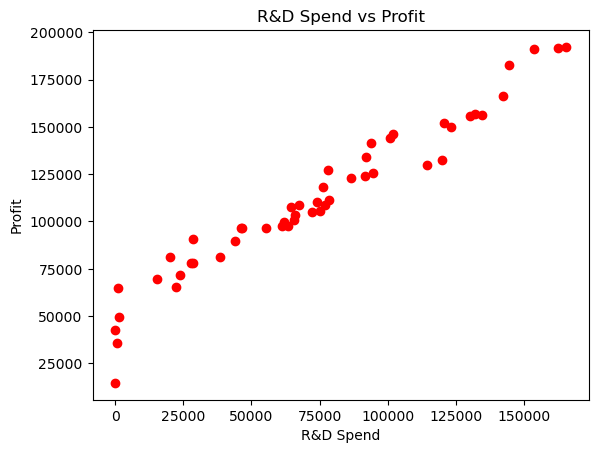

In [ ]:
#Check relationship between two variable
plt.scatter(data['R&D Spend'],data['Profit'],color='red')

plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

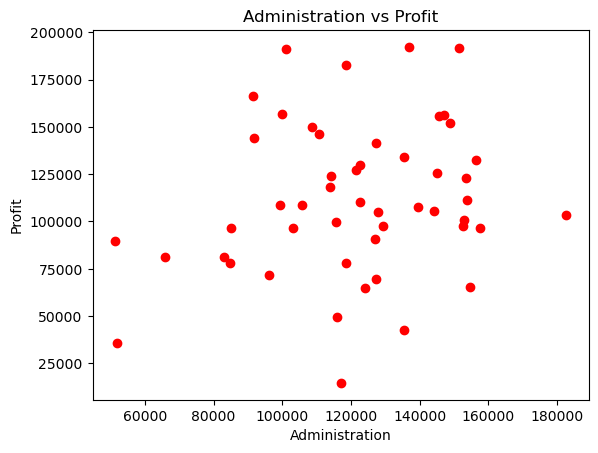

In [ ]:
plt.scatter(data['Administration'],data['Profit'],color='red')

plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

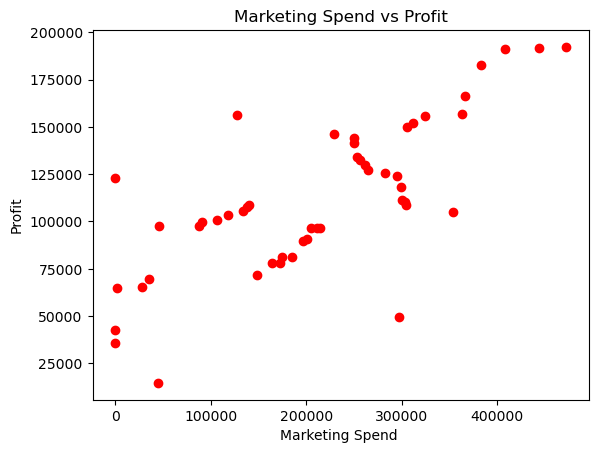

In [ ]:
plt.scatter(data['Marketing Spend'],data['Profit'],color='red')

plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend ')
plt.ylabel('Profit')
plt.show()

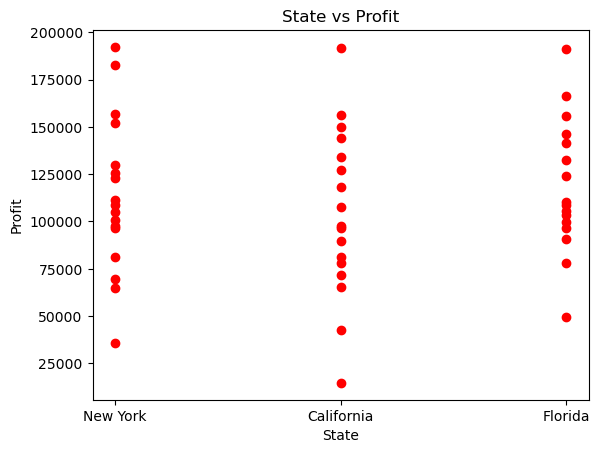

In [ ]:
plt.scatter(data['State'],data['Profit'],color='red')

plt.title('State vs Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

In [ ]:
data.corr()

C:\Users\Laptop hub\AppData\Local\Temp\ipykernel_1768\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


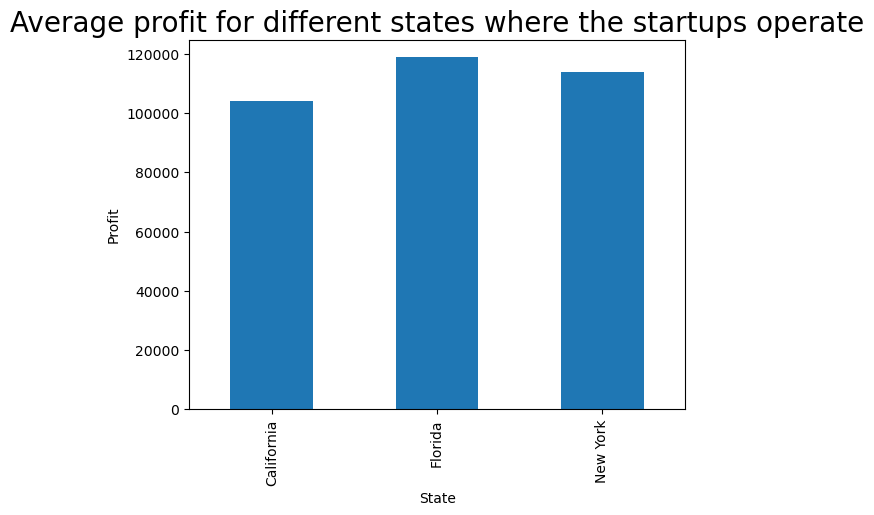

In [ ]:
ax = data.groupby(['State'])['Profit'].mean().plot(kind='bar')
ax.set_title('Average profit for different states where the startups operate',fontsize=20)
ax.set_xlabel('State')
ax.set_ylabel('Profit')
plt.show()

In [ ]:
data.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
#Create dummy variable for the categorical variable
data['New York State']=np.where(data['State']=='New York',1,0)
data['California State']=np.where(data['State']=='California',1,0)
data['Florida State']=np.where(data['State']=='Florida',1,0)

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New York State,California State,Florida State
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [ ]:
# removing state column from the dataset
data=data.drop(['State'],axis=1)

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York State,California State,Florida State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,New York State,California State,Florida State
R&D Spend,1.000000,0.241955,0.724248,0.972900,0.039068,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,0.005145,-0.015478,0.010493
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.033670,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,0.031368,-0.145837,0.116244
New York State,0.039068,0.005145,-0.033670,0.031368,1.000000,-0.515152,-0.492366
California State,-0.143165,-0.015478,-0.168875,-0.145837,-0.515152,1.000000,-0.492366
Florida State,0.105711,0.010493,0.205685,0.116244,-0.492366,-0.492366,1.000000


In [ ]:
dependent_variable=data['Profit']
independent_variable=data.drop(['Profit'],axis=1)
independent_variable.head()

,R&D Spend,Administration,Marketing Spend,New York State,California State,Florida State
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [ ]:
# creating data for x

X=independent_variable.values

# creating data for y

y=dependent_variable.values


In [ ]:
X

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [ ]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# split data into train & test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(40, 6)

In [ ]:
X_test.shape

(10, 6)

In [ ]:
# Train the model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test.shape

(10, 6)

In [ ]:
y_test.shape

(10,)

In [ ]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
#Test the model
#prediction
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
# from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9347068473282425